# 딥러닝 구조와 모델
---
## 딥러닝 구조와 레이어(Layer)
---
### 딥러닝 구조

#### 케라스에서 제공하는 API들의 구성도
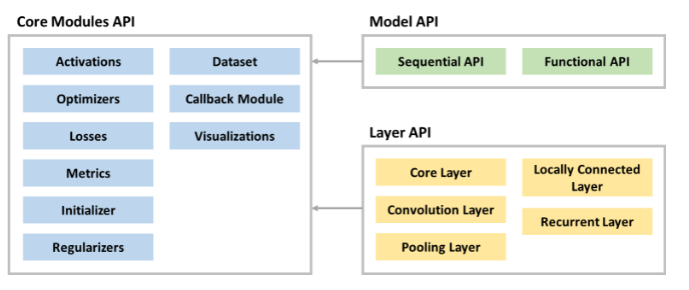  
**Model API**와 **Layer API**가 있고 필요한 모듈들을 **Modules API**를 호출해서 사용  

### 레이어(Layer)
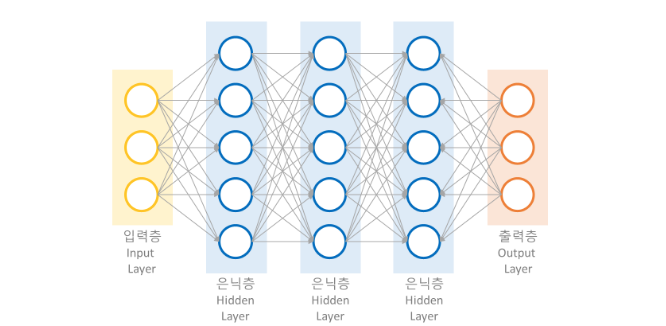  
딥러닝은 여러 개의 레이어(Layer)로 구성되어 있으며,  
기본적으로 **입력층(Input Layer)**, **은닉층(Hidden Layer)**, **출력층(Output Layer)** 으로 구분됩니다.  
레이어는 딥러닝 모델을 구성하는 핵심 데이터 구조로서 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈입니다.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Input 객체
딥러닝 모델의 입력을 정의할 때 사용  
입력 데이터 모양(shape)과 예상되는 데이터 유형(dtype)등을 포함

In [5]:
'''
tf.keras.Input
Parameters
- shape : 입력데이터 모양
- dtyype : 데이터 유형
- batch_size : 배치 크기 지정 가능
- name : 이름을 지정 가능
'''
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

#### Dense 레이어
**완전연결계층(Fully-Connected Layer)** 으로 노드수(유닛수)를 지정하면 생성

In [7]:
'''
tf.keras.layers.Dense
Parameters
- 노드수(유닛수)
- name : 이름 지정 가능
- activation : 활성화 함수 종류 지정 가능
- 
'''
layers.Dense(10, activation='relu', name='Dense Layer')

In [8]:
# 랜덤 Input 생성
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
# Dense Layer 사용
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
# 가중치 및 결과 값 확인
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.5719285  0.70678973]
 [0.9721887  0.53204167]
 [0.69011486 0.5134598 ]
 [0.6320381  0.68564236]
 [0.48535347 0.7895856 ]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.54540294,  0.6806037 ,  0.5229283 ,  0.6832498 , -0.57409555,
         0.11807352, -0.17100525, -0.13282818,  0.03629535,  0.6364179 ],
       [-0.02322716, -0.6658    , -0.09442765,  0.50795466,  0.49999517,
        -0.39431748, -0.68498117,  0.5272173 , -0.08659494, -0.29295465]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.29551476 0.         0.23233712 0.74978715 0.02504985 0.
  0.         0.29666358 0.         0.1569282 ]
 [0.51787674 0.3074419  0.45814556 0.93450075 0.         0.
  0.         0.1513

#### Activation 레이어
활성화 함수 : 이전 레이어의 결과값을 변환하여 다른 레이어로 전달
**선형 활성화 함수(Linear activation function)** 와 **비선형 활성화 함수(Non-linear activation function)** 로 구분 가능  
**딥러닝에서는** 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 **모델 표현력을 위해서 비선형 활성화 함수를 사용**

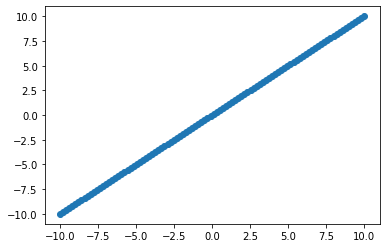

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -10부터 10 사이의 수 가운데 100개의 값을 입력 데이터로 사용
input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

---
1. **시그모이드(sigmoid) 함수** 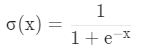
    - 확률 예측 모델에 자주 사용, 값을 0과 1사이로 나타냄
    - 0과 1에서 포화(saturate)되는 문제 : 입력값이 작아도 0이하가 될 수 없다
    - 훈련 시간이 오래 걸림
    - 그래디언트(gradient)가 0에 가까워져서 가중치 업데이트가 발생하지 않게됨


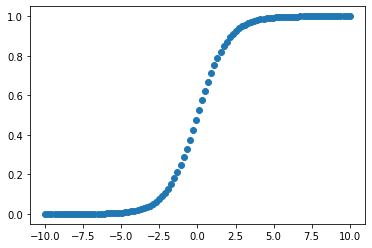

In [10]:
# 시그모이드 함수
layer = layers.Activation('sigmoid')
output = layer(input)
plt.scatter(x, output)
plt.show()

---
2. **하이퍼볼릭 탄젠트 함수** 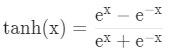  
    - 0을 중심으로 -1과 1사이로 값을 나타냄
    - 비교적 시그모이드 함수보다 훈련 속도가 빠름
    - 1과 -1에서 포화되는 문제 발생

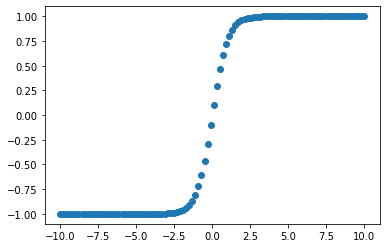

In [11]:
# 하이퍼볼릭 탄젠트
layer = layers.Activation('tanh')
output = layer(input)
plt.scatter(x, output)
plt.show()

---
3. **ReLU(Rectified Linear Unit) 함수** 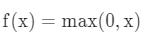  
    - 0부터 무한대까지의 범위
    - 하이퍼볼릭 탄젠트 함수보다 몇 배 더 빠른 훈련 속도
    - 출력값이 0이 중심이 아니고 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력을 0으로만 하는 문제

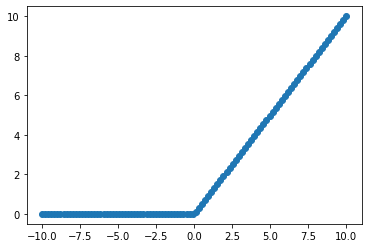

In [12]:
# ReLU
layer = layers.Activation('relu')
output = layer(input)
plt.scatter(x, output)
plt.show()

---
4. **Leaky ReLU 함수** 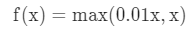  
    - ReLU 함수에서 노드 출력을 0으로만 하던 문제를 아주 작은 음수값을 출력하게 만들어 해결

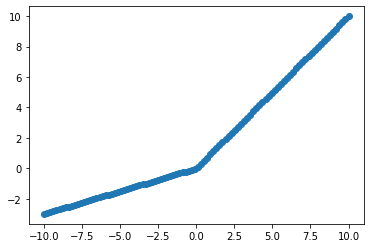

In [13]:
layer = layers.LeakyReLU()
output = layer(input)
plt.scatter(x, output)
plt.show()

---
5. **ELU(Exponential Linear Unit) 함수** 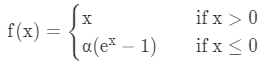  
    - ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결
    - 0이하에서는 exponential 연산이 수행 : 계산 비용이 높아지는 단점


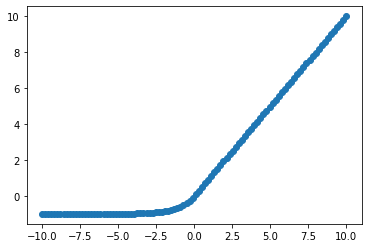

In [14]:
layer = layers.ELU()
output = layer(input)
plt.scatter(x, output)
plt.show()

---
#### Flatten 레이어
배치 크기(또는 데이터 크기)르르 제외하고 데이터를 1차원 형태로 평평하게 변환

In [15]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [16]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


---
## 딥러닝 모델
---
딥러닝 모델을 구성하는 방법
1. **Sequential API**
2. **Functional API**
3. **Subclassing API**

In [17]:
from tensorflow.keras import models, utils

### Sequential API
순차적인 구조로 진행할 때 사용하는 간단한 방법  

In [18]:
# Sequential 객체 생성 후,add()를 이용하여 사용할 레이어들을 추가
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_2 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_3 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


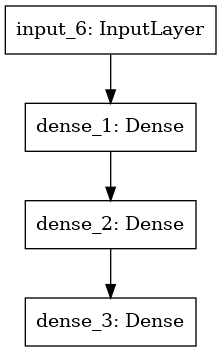

In [19]:
# 시각화 함수
utils.plot_model(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


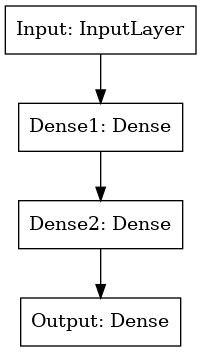

In [20]:
# Sequential 인자로 한번에 선언 가능
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()
utils.plot_model(model)

### Functional API
가장 권장되는 방법으로 딥러닝 모델을 복잡하고 유연하게 구성하는 것이 가능하고, 다중 입출력을 다룰 수 있다

#### 다중 입출력
- Input 객체를 여러 레이어에서 사용 가능  
- 여러 Input 객체 사용 가능 
- 결과를 여러개로 나눠서 사용 가능

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 28, 100)      2900        input_11[0][0]                   
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 28, 30)       3030        dense_16[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 28, 58)       0           input_11[0][0]                   
                                                                 dense_17[0][0]             

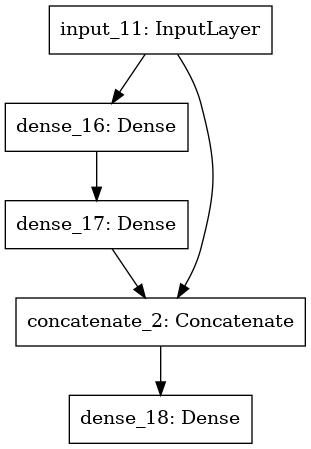

In [25]:
# Concatenate()를 이용하여 Dense 레이어 결과와 Input을 결합
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()
utils.plot_model(model)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 10, 10)       1010        dense_21[0][0]                   
____________________________________________________________________________________________

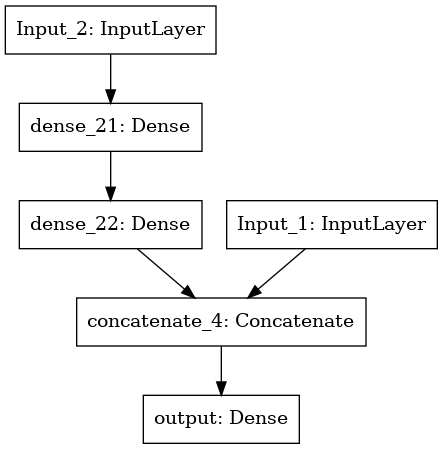

In [27]:
# 여러 Input 객체를 사용 가능
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()
utils.plot_model(model)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 10, 10)       1010        dense_23[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_24[0][0]                   
____________________________________________________________________________________________

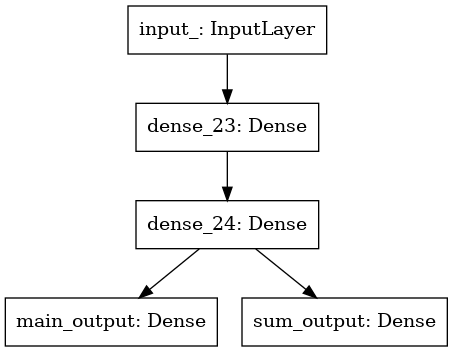

In [28]:
# 결과를 여러개로 나눠서 사용 가능
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()
utils.plot_model(model)

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 10, 10)       1010        dense_25[0][0]                   
____________________________________________________________________________________________

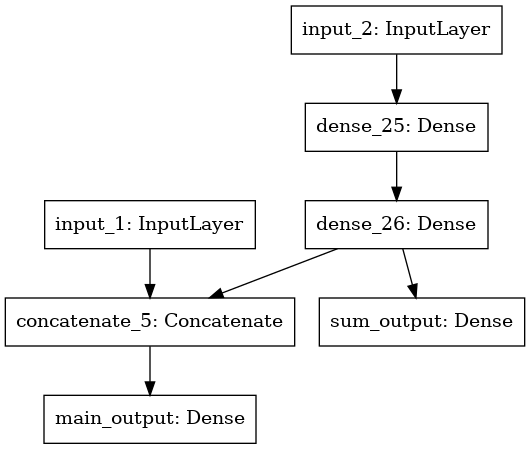

In [29]:
# 다중 입출력 모델
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()
utils.plot_model(model)

### Subclassing API
커스터마이징에 최적화된 방법  
Model 클래스를 상속받아서 사용  
모델에 포함되는 다음과 같은 기능을 사용 가능
- fit(): 모델 학습
- evaluate(): 모델 평가
- predict(): 모델 예측
- save(): 모델 저장
- load(): 모델 불러오기
- call(): 메소드안에서 원하는 계산 가능

In [30]:
# Subclassing API의 예시
class MyModel(models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer1 = layers.Dense(300, activation=activation)
        self.dense_layer2 = layers.Dense(100, activation=activation)
        self.dense_layer3 = layers.Dense(units, activation=activation)
        self.output_layer = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

---
### 예제: summary 값과 utils.plot_model 결과값으로 모델 구현하기
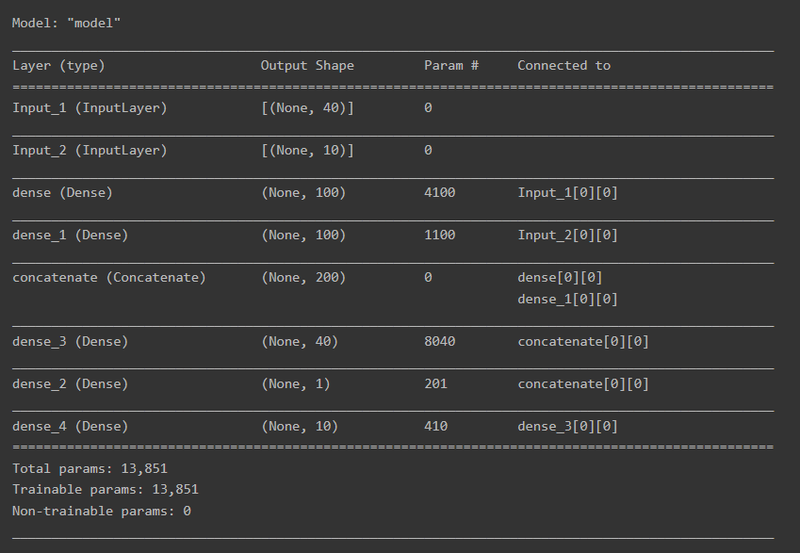  
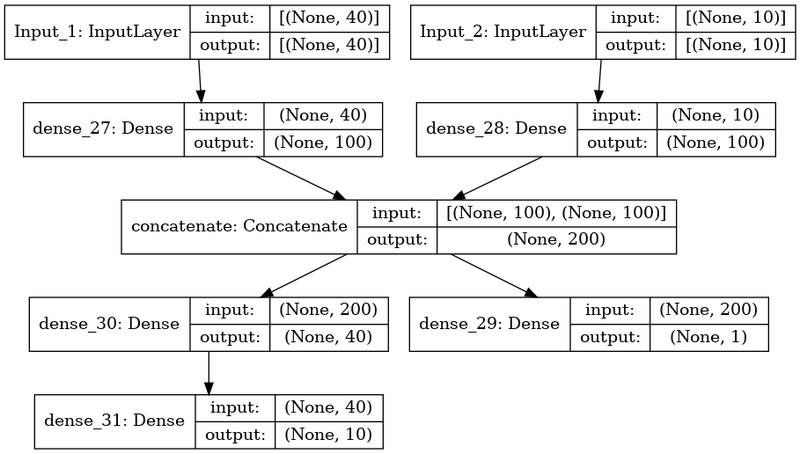  

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 100)          4100        input_1[0][0]                    
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 100)          1100        input_2[0][0]                    
___________________________________________________________________________________________

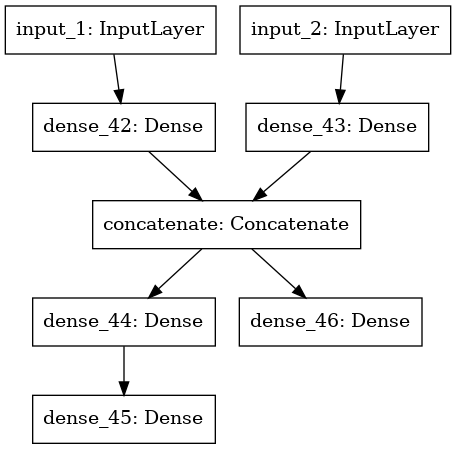

In [46]:
input_1 = keras.Input(shape=(40), name='input_1')
input_2 = keras.Input(shape=(10), name='input_2')

x1 = layers.Dense(100)(input_1)
x2 = layers.Dense(100)(input_2)

concat = layers.Concatenate(name='concatenate')([x1, x2])

out1 = layers.Dense(40)(concat)
out1 = layers.Dense(10)(out1)

out2 = layers.Dense(1)(concat)


model = models.Model(inputs=[input_1, input_2], outputs=[out1, out2])
model.summary()
utils.plot_model(model)